TODO

- New Derived Variables
    - CarName w.r.t price to 3 or 4 Categories ( check correlation between car manufactures)
    - City and highway mileage to one variable instead of two variables

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

The company wants to know:
 -	Which variables are significant in predicting the price of a car
 -	How well those variables describe the price of a car
 
#### Business Goal
Need to model the price of cars with the available independent variables

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [4]:
import chardet

##### Utility methods

In [5]:
def train_model(X, y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X

In [6]:
def calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [7]:
def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

print(find_encoding('CarPrice_Assignment.csv'))

ascii


### 1. Read the data
    - Read the data
    - clean the data

In [8]:
df_cars = pd.read_csv('CarPrice_Assignment.csv')

In [9]:
df_cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [10]:
df_cars.shape

(205, 26)

In [11]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [12]:
df_cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

#### Data Preparation

 - There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [13]:
# split the carName to CarMake and model and return CarMake

def carNameToCarMake(x):
    if " " in x:
        return x.split(" ", 1)[0]
    return x

In [14]:
def correctCarMake(x):
    spellMap =  {
         "vw":"volkswagen",
         "vokswagen":"volkswagen",
         "toyouta":"toyota", 
         "porcshce":"porsche", 
         "maxda":"mazda"
    }
    if x in spellMap:
        return spellMap[x]
    return x        

In [15]:
# Conver to lowercase for consistency
df_cars['CarName'] = df_cars['CarName'].str.lower()

In [16]:
pd.unique(df_cars.CarName)

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu mu-x', 'isuzu d-max ',
       'isuzu d-max v-cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [17]:
df_cars['CarName'] = df_cars['CarName'].map(carNameToCarMake)

In [18]:
df_cars['CarName'] = df_cars['CarName'].map(correctCarMake)

In [19]:
##### CarId is an unnecessary column, lets remove that
df_cars.drop(labels=['car_ID'], axis=1, inplace=True)

In [20]:
df_cars.head()

symboling      CarName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
0        rwd          front       88.6      168.8  ...         130   
1        rwd          front       88.6      168.8  ...         130   
2        rwd          front       94.5      171.2  ...         152   
3        fwd          front       99.8      176.6  ...         109   
4        4wd          front       99.4      176.6  ...         136   

   fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  citympg  \
0        mpfi       3.47   2.68              9.0         111    5000       21   
1        mpfi       3.47   2.68              9.0         111    5000       21   
2        mpfi       2.68   3.47              9.0         154    5000       19   
3        mpfi       3.19   3.40             10.0         102    5500       24   
4        mpfi       3.19   3.40              8.0         115    5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 25 columns]

In [21]:
df_cars.shape

(205, 25)

In [22]:
# sns.boxplot(x="carbody", y="price", data=df_cars)

In [23]:
# plt.figure(figsize = (20,10))  
# sns.boxplot(x="CarName", y="price", data=df_cars)

## 2. Visualize the data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [24]:
colList = list(df_cars.columns)

In [25]:
print(colList, len(colList))

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 25


In [26]:
cat_vars = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
            'enginetype', 'cylindernumber','fuelsystem']

print(cat_vars, len(cat_vars))

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 11


In [27]:
non_cat_vars = list(set(colList)-set(cat_vars)-set(['price']))
print(non_cat_vars, len(non_cat_vars))

['compressionratio', 'wheelbase', 'citympg', 'highwaympg', 'peakrpm', 'curbweight', 'carwidth', 'horsepower', 'carlength', 'carheight', 'enginesize', 'stroke', 'boreratio'] 13


In [28]:
dependent_var = ['price']

##### Visualize price

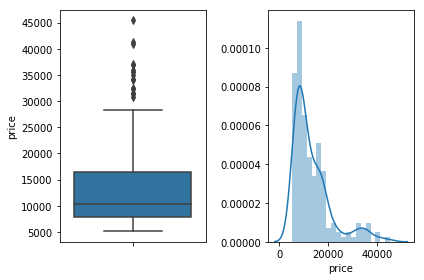

In [62]:
plt.subplot(1,2,1)
sns.boxplot(y=df_cars.price)

plt.subplot(1,2,2)
sns.distplot(df_cars.price, bins=20)

plt.tight_layout()

In [40]:
# sns.distplot(df_cars.price, bins=20)

In [87]:
# sns.boxplot(y=df_cars.price)

In [91]:
cat_vars

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [99]:
pd.DataFrame(df_cars.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False))

price
fuelsystem              
mpfi        17754.602840
idi         15838.150000
mfi         12964.000000
4bbl        12145.000000
spfi        11048.000000
spdi        10990.444444
1bbl         7555.545455
2bbl         7478.151515

In [98]:
pd.DataFrame(df_cars.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False))

price
cylindernumber              
eight           37400.100000
twelve          36000.000000
six             23671.833333
five            21630.469727
two             13020.000000
four            10285.754717
three            5151.000000

In [96]:
pd.DataFrame(df_cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))

price
enginetype              
dohcv       31400.500000
ohcv        25098.384615
dohc        18116.416667
l           14627.583333
ohcf        13738.600000
rotor       13020.000000
ohc         11574.048426

In [95]:
pd.DataFrame(df_cars.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False))

price
enginelocation              
rear            34528.000000
front           12961.097361

In [94]:
pd.DataFrame(df_cars.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False))

price
drivewheel              
rwd         19910.809211
4wd         11087.463000
fwd          9239.308333

In [93]:
pd.DataFrame(df_cars.groupby(['aspiration'])['price'].mean().sort_values(ascending = False))

price
aspiration              
turbo       16298.166676
std         12611.270833

In [92]:
pd.DataFrame(df_cars.groupby(['symboling'])['price'].mean().sort_values(ascending = False))

price
symboling              
-1         17330.681818
 3         17221.296296
-2         15781.666667
 0         14366.965179
 2         10109.281250
 1         10037.907407

In [82]:
pd.DataFrame(df_cars.groupby(['CarName'])['price'].mean().sort_values(ascending = False))

price
CarName                  
jaguar       34600.000000
buick        33647.000000
porsche      31400.500000
bmw          26118.750000
volvo        18063.181818
audi         17859.166714
mercury      16503.000000
alfa-romero  15498.333333
peugeot      15489.090909
saab         15223.333333
mazda        10652.882353
nissan       10415.666667
volkswagen   10077.500000
toyota        9885.812500
renault       9595.000000
mitsubishi    9239.769231
isuzu         8916.500000
subaru        8541.250000
honda         8184.692308
plymouth      7963.428571
dodge         7875.444444
chevrolet     6007.000000

In [85]:
pd.DataFrame(df_cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))

price
fueltype            
diesel    15838.1500
gas       12999.7982

In [86]:
pd.DataFrame(df_cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))

price
carbody                  
hardtop      22208.500000
convertible  21890.500000
sedan        14344.270833
wagon        12371.960000
hatchback    10376.652386

In [89]:
pd.DataFrame(df_cars.groupby(['doornumber'])['price'].mean().sort_values(ascending = False))

price
doornumber              
four        13501.152174
two         12989.924078

In [101]:
pd.DataFrame(df_cars.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False))

price
drivewheel              
rwd         19910.809211
4wd         11087.463000
fwd          9239.308333

In [113]:
df_cars.groupby(['drivewheel'])['price'].count()

drivewheel
4wd      9
fwd    120
rwd     76
Name: price, dtype: int64

In [102]:
temp = df_cars.groupby(['drivewheel'])

In [112]:
temp.aggregate('price')

#### Visualize Numerical Data

In [48]:
non_cat_vars.sort()
print(non_cat_vars, len(non_cat_vars))

['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'wheelbase'] 13


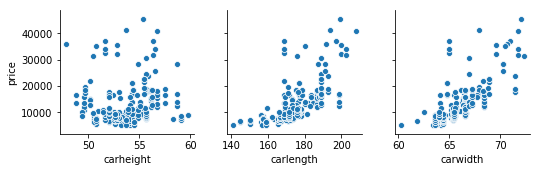

In [50]:
sns.pairplot(df_cars, x_vars=['carheight', 'carlength', 'carwidth'], y_vars=dependent_var)

- carlenght and carwidth has positive correlation with the price
- carheight appears not to have any correlation with price

In [57]:
print(np.corrcoef(df_cars.price, df_cars.carheight))
print(np.corrcoef(df_cars.price, df_cars.carwidth))
print(np.corrcoef(df_cars.price, df_cars.carlength))

[[1.         0.11933623]
 [0.11933623 1.        ]]
[[1.        0.7593253]
 [0.7593253 1.       ]]
[[1.         0.68292002]
 [0.68292002 1.        ]]


- We may ignore carheight for the modelling analysis

In [58]:
ignored_x_features = ['carheight']

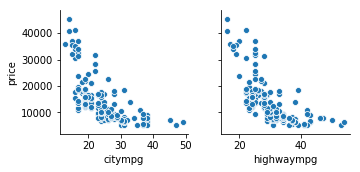

In [59]:
sns.pairplot(df_cars, x_vars=['citympg', 'highwaympg',], y_vars=dependent_var)

- Both citympg and highwaympg has negative correlation with price

In [61]:
print(np.corrcoef(df_cars.price, df_cars.citympg))
print(np.corrcoef(df_cars.price, df_cars.highwaympg))
print(np.corrcoef(df_cars.citympg, df_cars.highwaympg))

[[ 1.         -0.68575134]
 [-0.68575134  1.        ]]
[[ 1.         -0.69759909]
 [-0.69759909  1.        ]]
[[1.         0.97133704]
 [0.97133704 1.        ]]


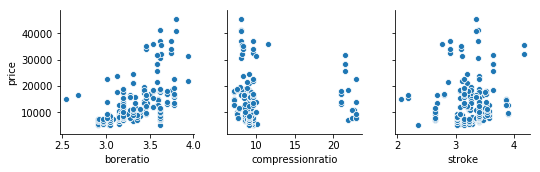

In [52]:
sns.pairplot(df_cars, x_vars=['boreratio', 'compressionratio','stroke'], y_vars=dependent_var)

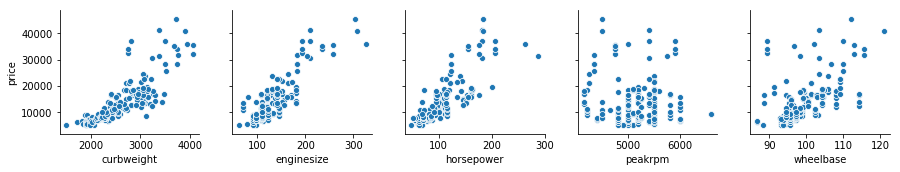

In [53]:
sns.pairplot(df_cars, x_vars=['curbweight', 'enginesize', 'horsepower', 'peakrpm', 'wheelbase'],y_vars=dependent_var)

In [63]:
# x = non_cat_vars
# y = dependent_var

# sns.pairplot(df_cars, x_vars=x, y_vars=y, aspect=1)
# plt.savefig('price-vs-others.png')

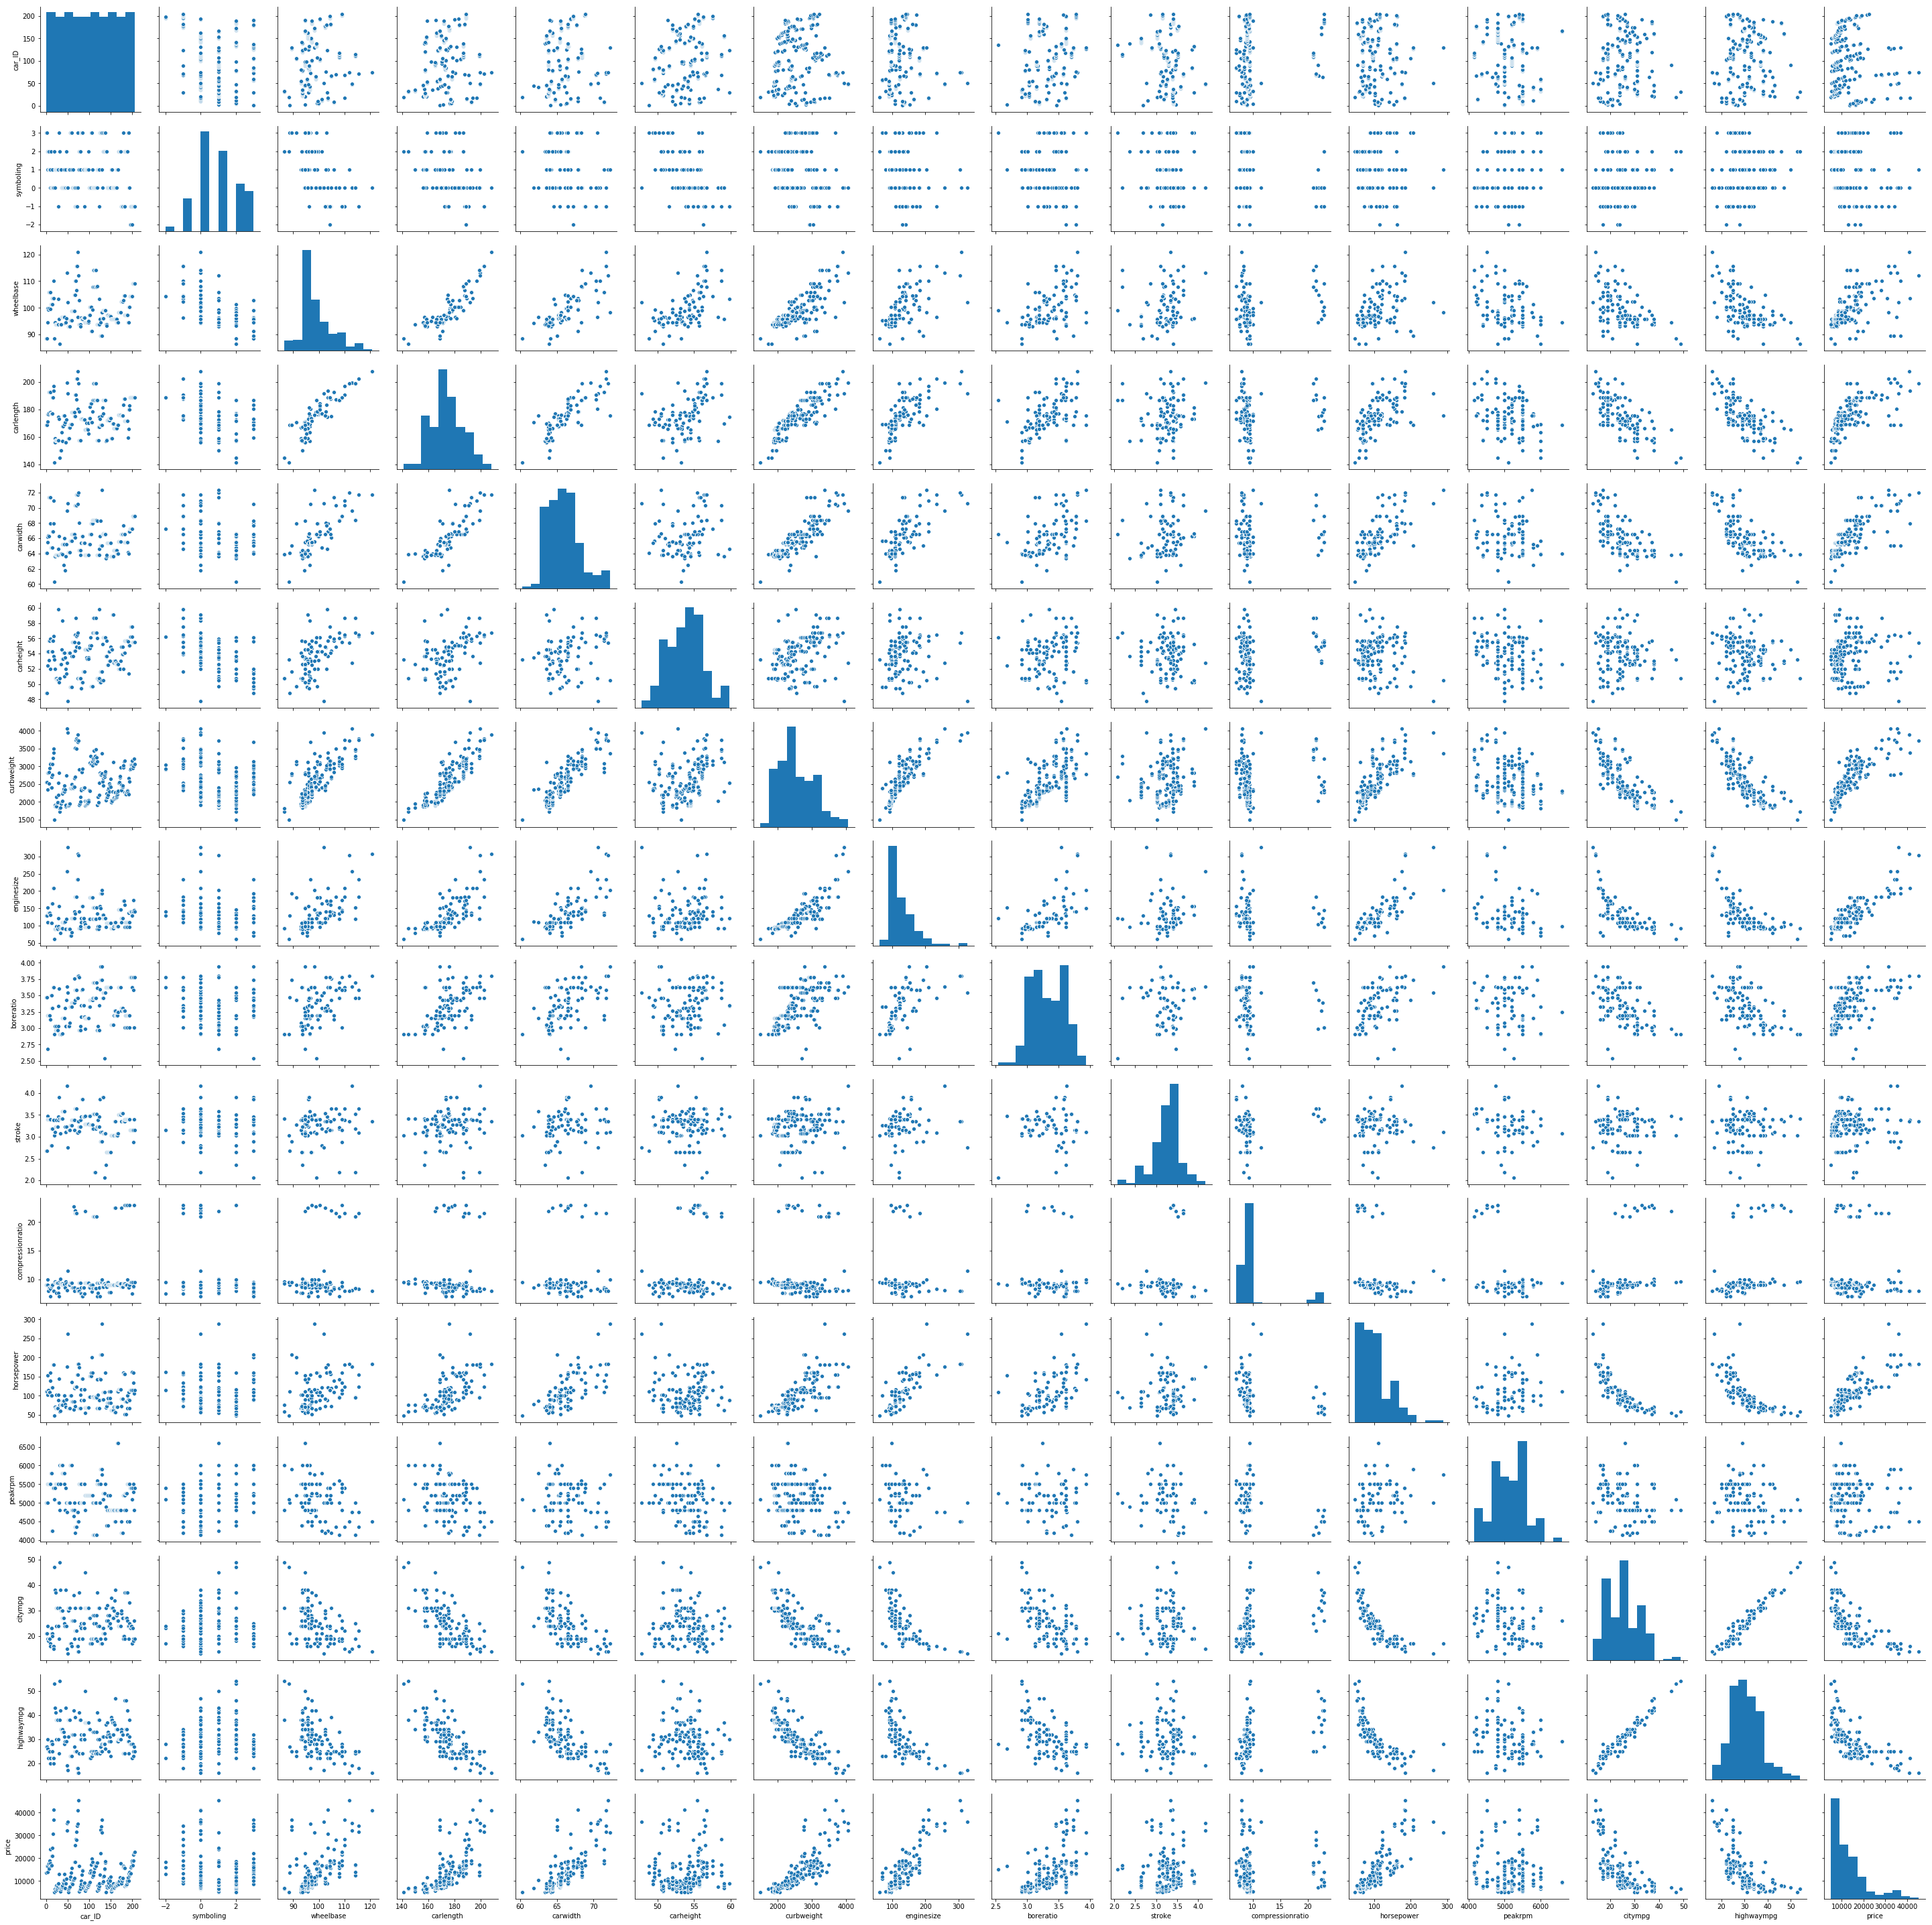

In [18]:
sns.pairplot(df_cars)
plt.savefig('pairplot-raw.png')

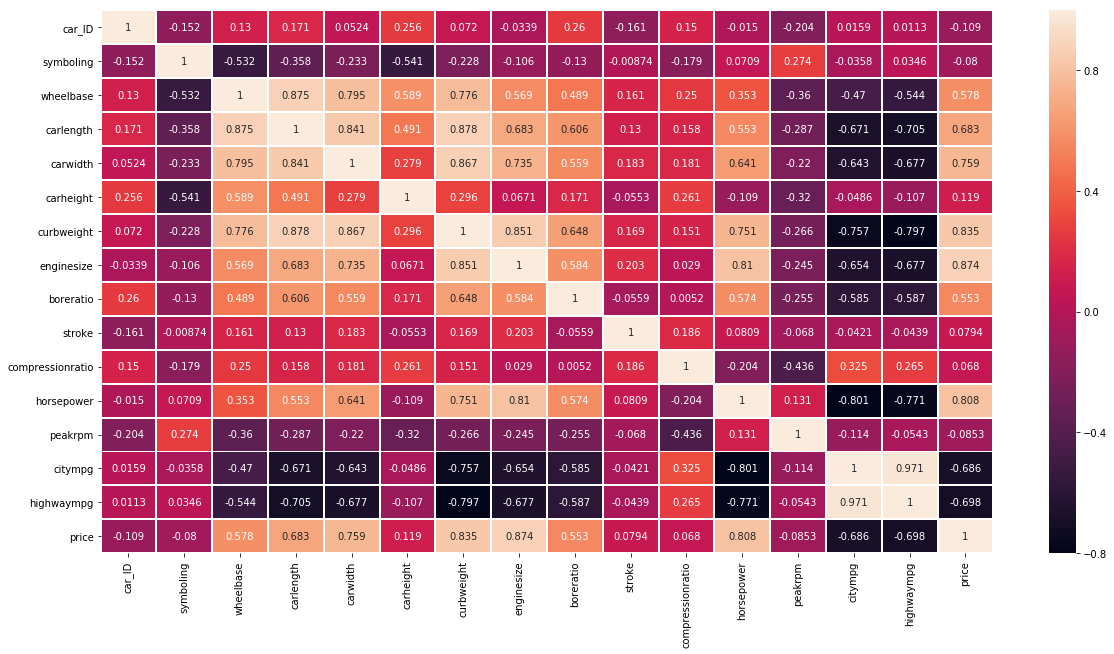

In [19]:
plt.figure(figsize = (20,10))  
# sns.heatmap(pd.DataFrame.round(df_cars.corr(), 3), annot=True,fmt='.2g',linewidths=1)
sns.heatmap(df_cars.corr(), annot=True,fmt='.3g',linewidths=1)
plt.savefig('heatmap-raw.png')

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [20]:
print(cat_vars, len(cat_vars))

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 9


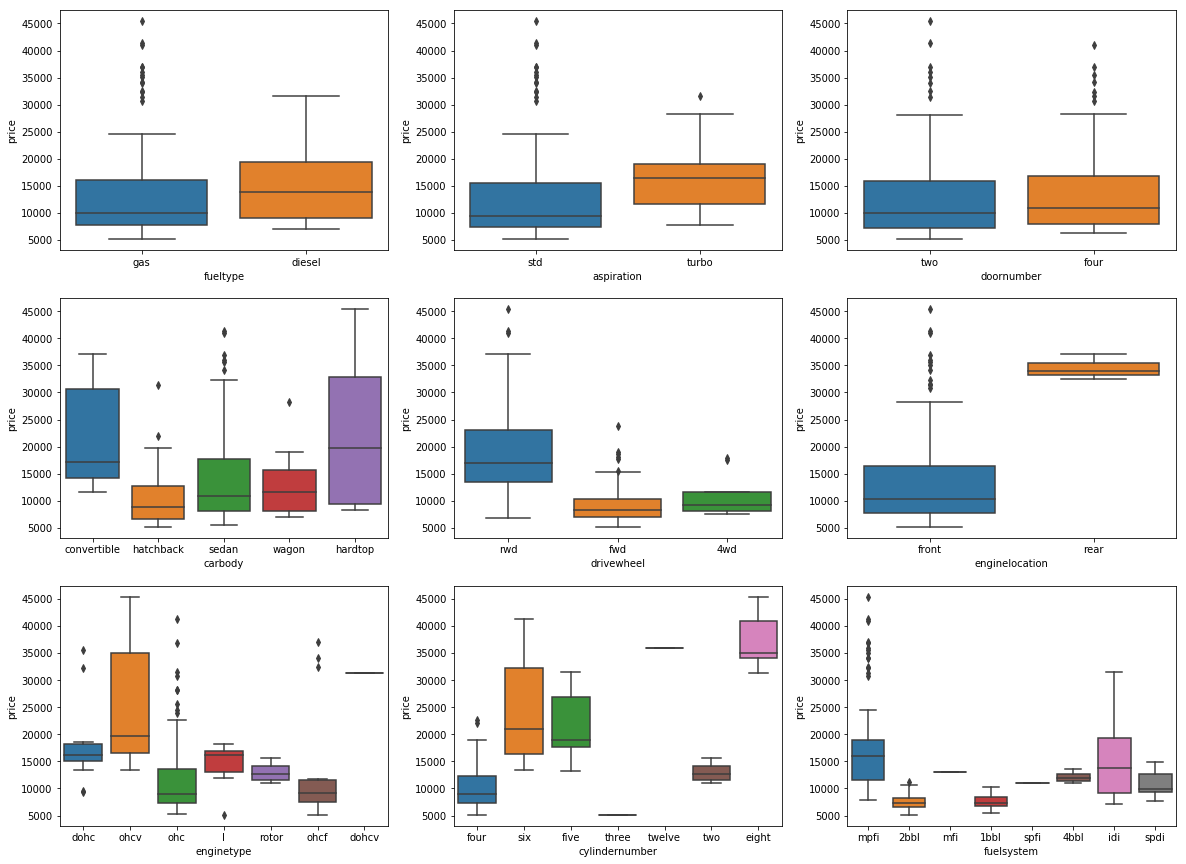

In [21]:
plt.figure(figsize=(20, 15))

for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x=cat_vars[i-1], y='price', data=df_cars)

plt.show()

### 3. Data Cleanup
    - Dealing with Variables which are plain numeric values
    - Dealing with CarName    
    - Dealing with Categorical Variables
    

In [22]:
def convert_to_num(x):
    return x.map({"one":1,"two":2,"three":3, "four":4, "five":5, "six":6, "eight":8,"twelve":12})

In [23]:
varlist =  ['doornumber','cylindernumber']

# Applying the function to the housing list
df_cars[varlist] = df_cars[varlist].apply(convert_to_num)

#### binary variables(Having only two values) - 
    --'fueltype', 
    --'aspiration',
    --'enginelocation',

- Lets convert the binary variables to numeric system

In [24]:
def convert_fuel(x):
    return x.map({"gas":1,"diesel":0})

In [25]:
def convert_aspiration(x):
    return x.map({"std":1,"turbo":0})

In [26]:
def convert_enginelocation(x):
    return x.map({"front":1,"rear":0})

In [27]:
df_cars[['aspiration']] = df_cars[['aspiration']].apply(convert_aspiration)

In [28]:
df_cars[['fueltype']] = df_cars[['fueltype']].apply(convert_fuel)

In [29]:
df_cars[['enginelocation']] = df_cars[['enginelocation']].apply(convert_enginelocation)

In [30]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm           

In [31]:
df_cars.describe()

car_ID   symboling    fueltype  aspiration  doornumber  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146    0.902439    0.819512    3.121951   
std     59.322565    1.245307    0.297446    0.385535    0.994966   
min      1.000000   -2.000000    0.000000    0.000000    2.000000   
25%     52.000000    0.000000    1.000000    1.000000    2.000000   
50%    103.000000    1.000000    1.000000    1.000000    4.000000   
75%    154.000000    2.000000    1.000000    1.000000    4.000000   
max    205.000000    3.000000    1.000000    1.000000    4.000000   

       enginelocation   wheelbase   carlength    carwidth   carheight  ...  \
count      205.000000  205.000000  205.000000  205.000000  205.000000  ...   
mean         0.985366   98.756585  174.049268   65.907805   53.724878  ...   
std          0.120377    6.021776   12.337289    2.145204    2.443522  ...   
min          0.000000   86.600000  141.100000   60.300000   47.800000  ...   
25%          1.000000   94.500000  166.300000   64.100000   52.000000  ...   
50%          1.000000   97.000000  173.200000   65.500000   54.100000  ...   
75%          1.000000  102.400000  183.100000   66.900000   55.500000  ...   
max          1.000000  120.900000  208.100000   72.300000   59.800000  ...   

       cylindernumber  enginesize   boreratio      stroke  compressionratio  \
count      205.000000  205.000000  205.000000  205.000000        205.000000   
mean         4.380488  126.907317    3.329756    3.255415         10.142537   
std          1.080854   41.642693    0.270844    0.313597          3.972040   
min          2.000000   61.000000    2.540000    2.070000          7.000000   
25%          4.000000   97.000000    3.150000    3.110000          8.600000   
50%          4.000000  120.000000    3.310000    3.290000          9.000000   
75%          4.000000  141.000000    3.580000    3.410000          9.400000   
max         12.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000  

[8 rows x 21 columns]

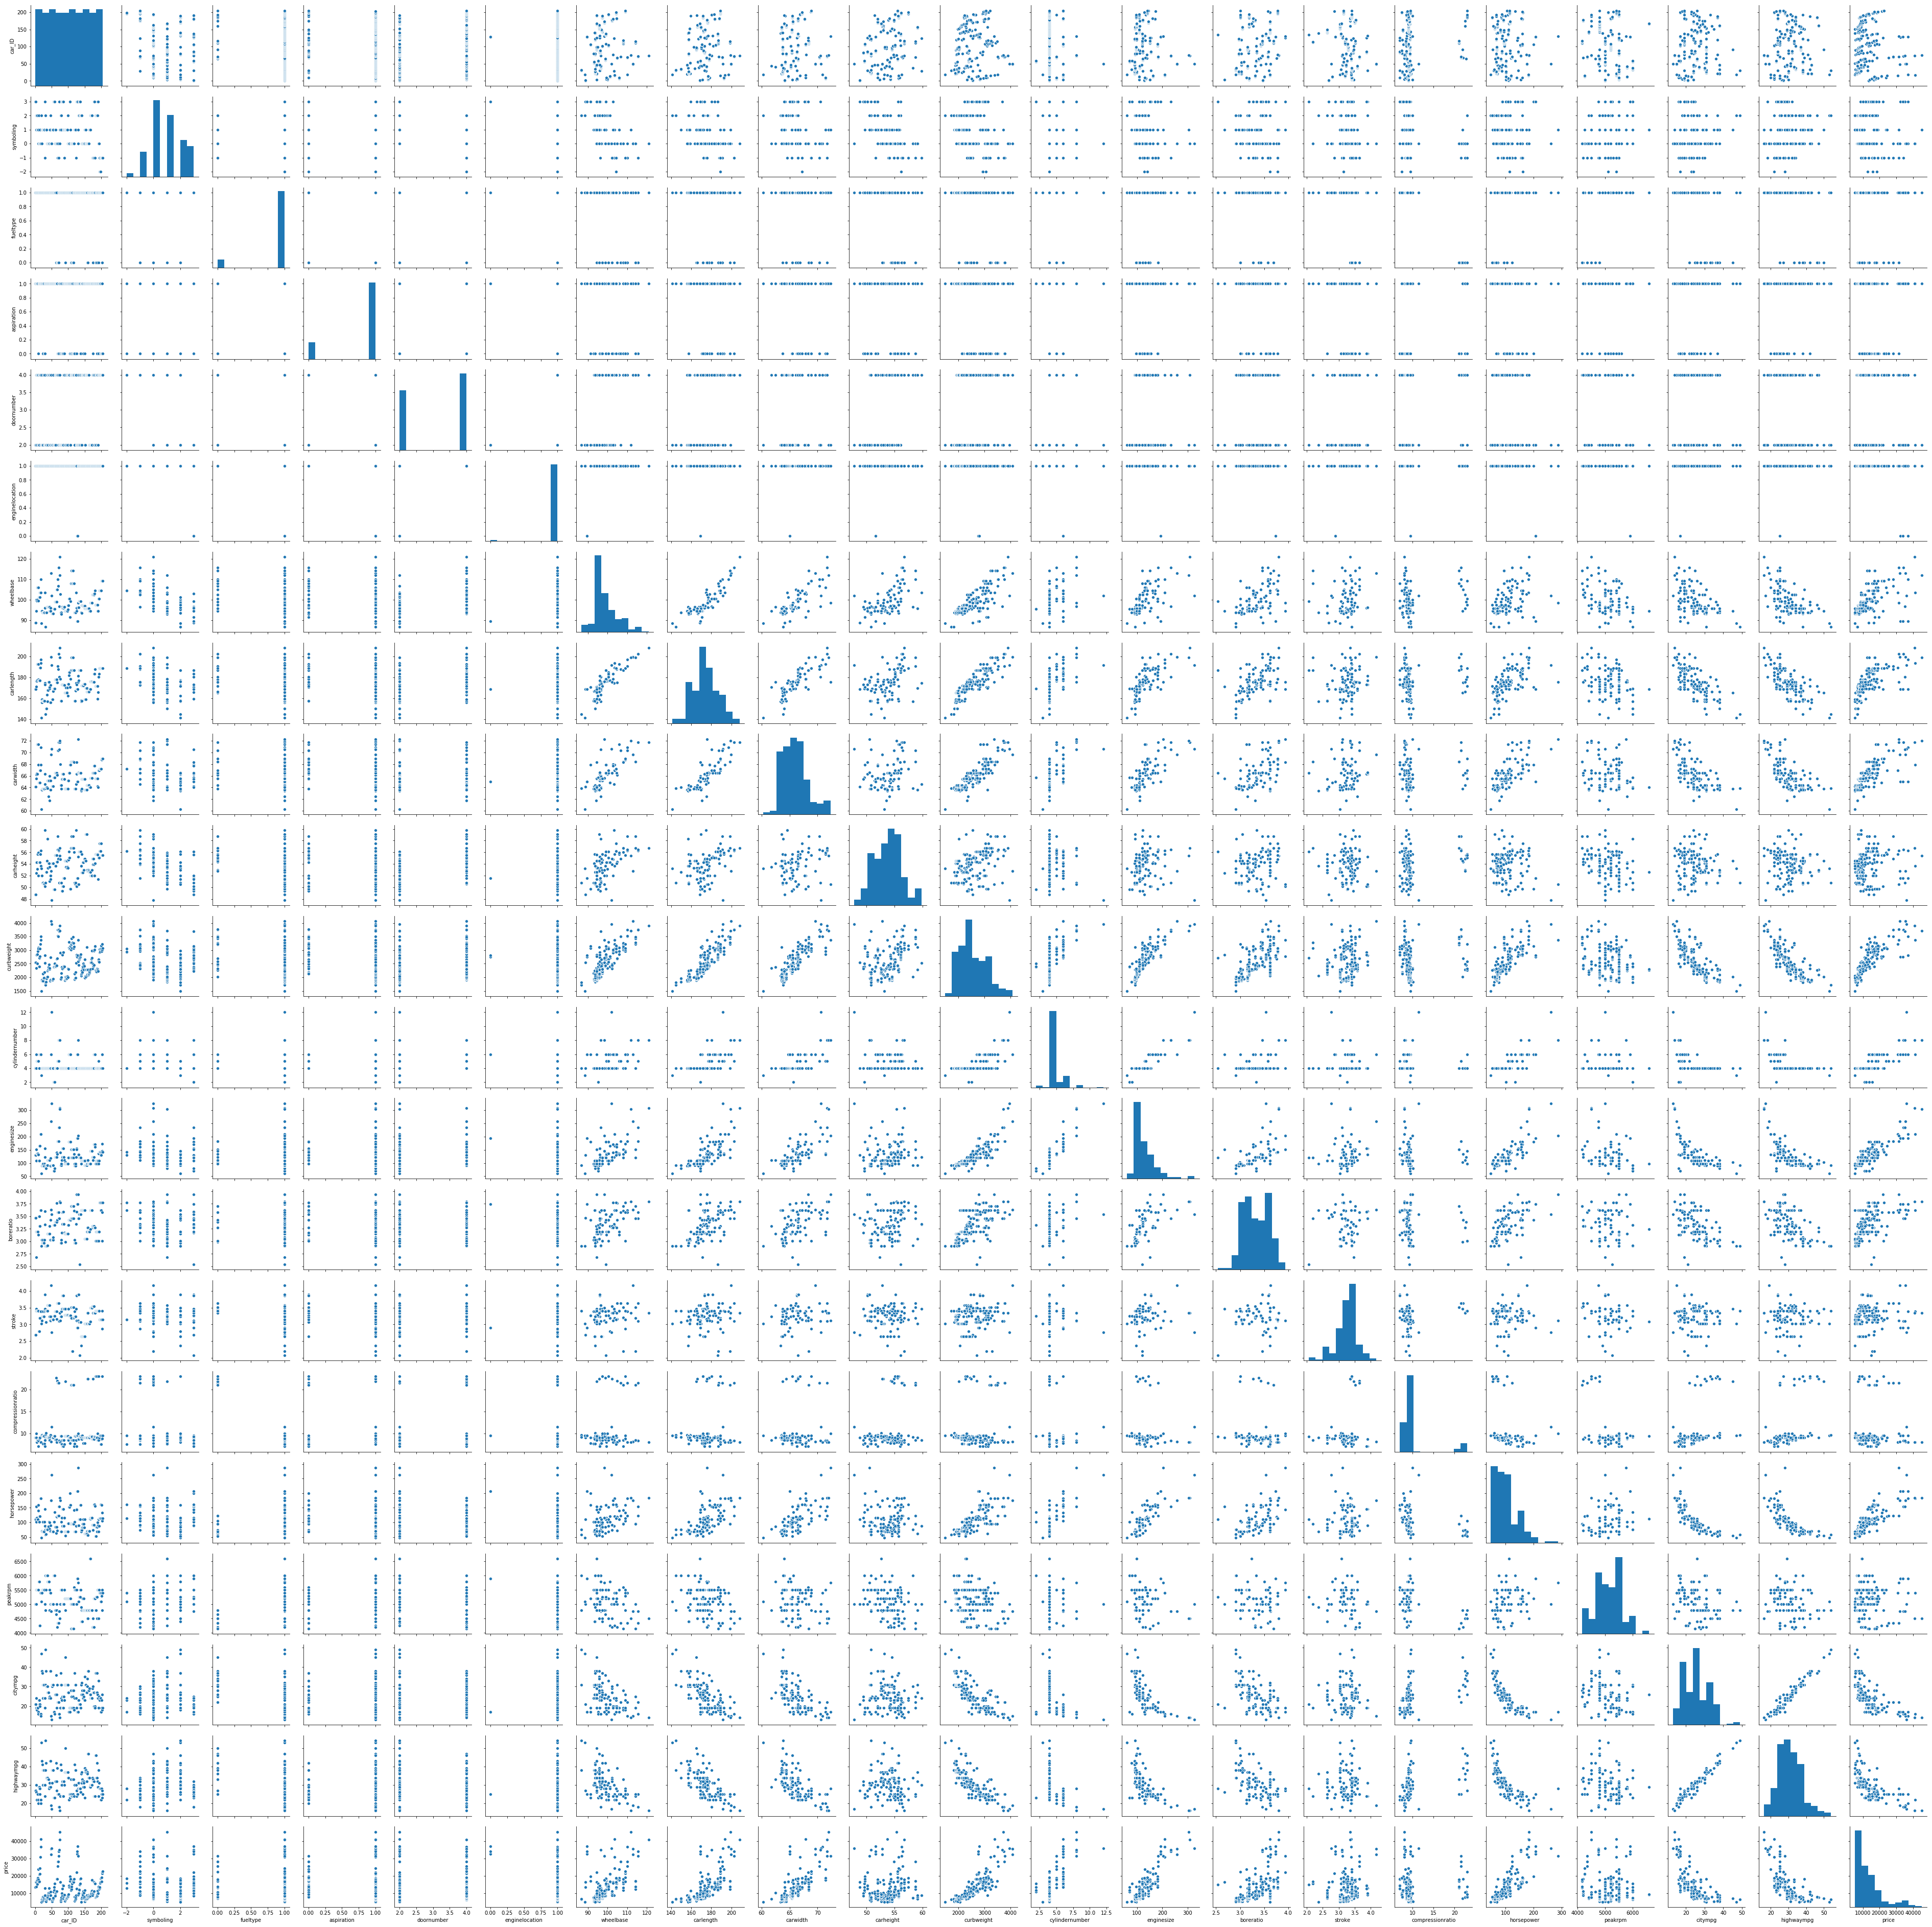

In [32]:
sns.pairplot(df_cars)
plt.savefig('pairplot-all.png')

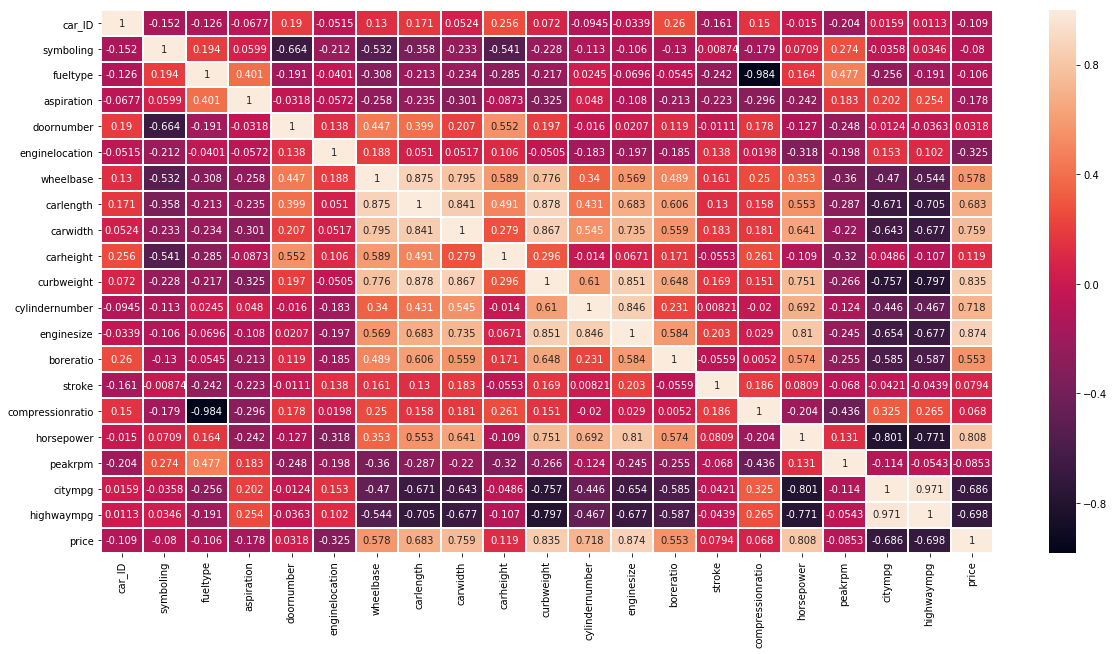

In [33]:
plt.figure(figsize = (20,10))  
sns.heatmap(df_cars.corr(), annot=True,fmt='.3g',linewidths=1)
plt.savefig('heatmap-raw.png')

- Some Strong corelations exists between independant variables

    - wheelbase - carlength, carwidth, curbweight
    
    - carlength - wheelbase, carwidth, curbweight
    
    - carwidth - wheelbase, carlength, curbweight
    
    - enginesize - curbweight, cylindernumber
    
    - horsepower - enginesize
    
    - citympg - higwaympg


In [34]:
df_cars.to_csv('cars.csv')

#### Creating dummy variables

Left of categorical variables shall be converted by means of pandas::get_dummies
        - 'carbody'
        - 'drivewheel'
        - 'enginetype'
        - 'fuelsystem'
        
No Need to create individual dummy variables.

In [35]:
# d_carbody = pd.get_dummies(df_cars['carbody'], drop_first=True)

In [36]:
# d_drivewheel = pd.get_dummies(df_cars['drivewheel'], drop_first=True)

In [37]:
# d_enginetype = pd.get_dummies(df_cars['enginetype'], drop_first=True)

In [38]:
# sum(list(map(lambda x : len(set(x))==1,d_fuelsystem.values)))

In [39]:
# d_fuelsystem = pd.get_dummies(df_cars['fuelsystem'], drop_first=True)

In [40]:
# d_fuelsystem.info()

In [41]:
cat_vars = ['carbody', 'drivewheel', 'enginetype', 'fuelsystem']
df_final = pd.get_dummies(df_cars, columns=cat_vars, drop_first=True)
df_final.to_csv('cars_dummies.csv')

In [42]:
print(df_final.columns, len(df_final.columns))

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object') 41


#### Dealing with CarName

From the data we can observe case is not consistent
- Convert to lower case

In [50]:
df_final.drop(labels=['car_ID'], axis=1, inplace=True)

In [51]:
df_final = pd.get_dummies(data=df_final, columns=['CarName'])

In [52]:
df_final.to_csv('car_dummies.csv')

In [53]:
df_final.shape

(205, 61)

In [54]:
df_final.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarName_alfa-romero',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_mazda', 'CarName_mercury', 'CarName_mitsubishi',
       'CarName_nissan', 'CarName_peugeot', 'CarName_plymouth',
   

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [56]:
# set random seed as 0 for consistency
np.random.seed(0)

In [57]:
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

##### lets check the train and test data

In [58]:
print(df_train.shape)
print(df_test.shape)

(143, 61)
(62, 61)


#### Rescaling the features

In [60]:
scaler = MinMaxScaler()

In [61]:
print(df_final.columns)

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarName_alfa-romero',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_mazda', 'CarName_mercury', 'CarName_mitsubishi',
       'CarName_nissan', 'CarName_peugeot', 'CarName_plymouth',
   

In [62]:
scaler_variables = ['wheelbase', 'carlength', 'carlength', 'carheight', 'curbweight', 'enginesize', 'boreratio','stroke','price']

In [63]:
df_train[scaler_variables] = scaler.fit_transform(df_train[scaler_variables])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [64]:
df_train.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
122          1         1           1           4               1   0.244828   
125          3         1           1           2               1   0.272414   
166          1         1           1           2               1   0.272414   
1            3         1           1           2               1   0.068966   
199         -1         1           0           4               1   0.610345   

     carlength  carwidth  carheight  curbweight  ...  CarName_nissan  \
122   0.426016      63.8   0.265487    0.272692  ...               0   
125   0.452033      68.3   0.212389    0.500388  ...               0   
166   0.448780      64.0   0.424779    0.314973  ...               0   
1     0.450407      64.1   0.088496    0.411171  ...               0   
199   0.775610      67.2   0.858407    0.647401  ...               0   

     CarName_peugeot  CarName_plymouth  CarName_porsche  CarName_renault  \
122                0                 1                0                0   
125                0                 0                1                0   
166                0                 0                0                0   
1                  0                 0                0                0   
199                0                 0                0                0   

     CarName_saab  CarName_subaru  CarName_toyota  CarName_volkswagen  \
122             0               0               0                   0   
125             0               0               0                   0   
166             0               0               1                   0   
1               0               0               0                   0   
199             0               0               0                   0   

     CarName_volvo  
122              0  
125              0  
166              0  
1                0  
199              1  

[5 rows x 61 columns]

In [65]:
# df_train.describe()

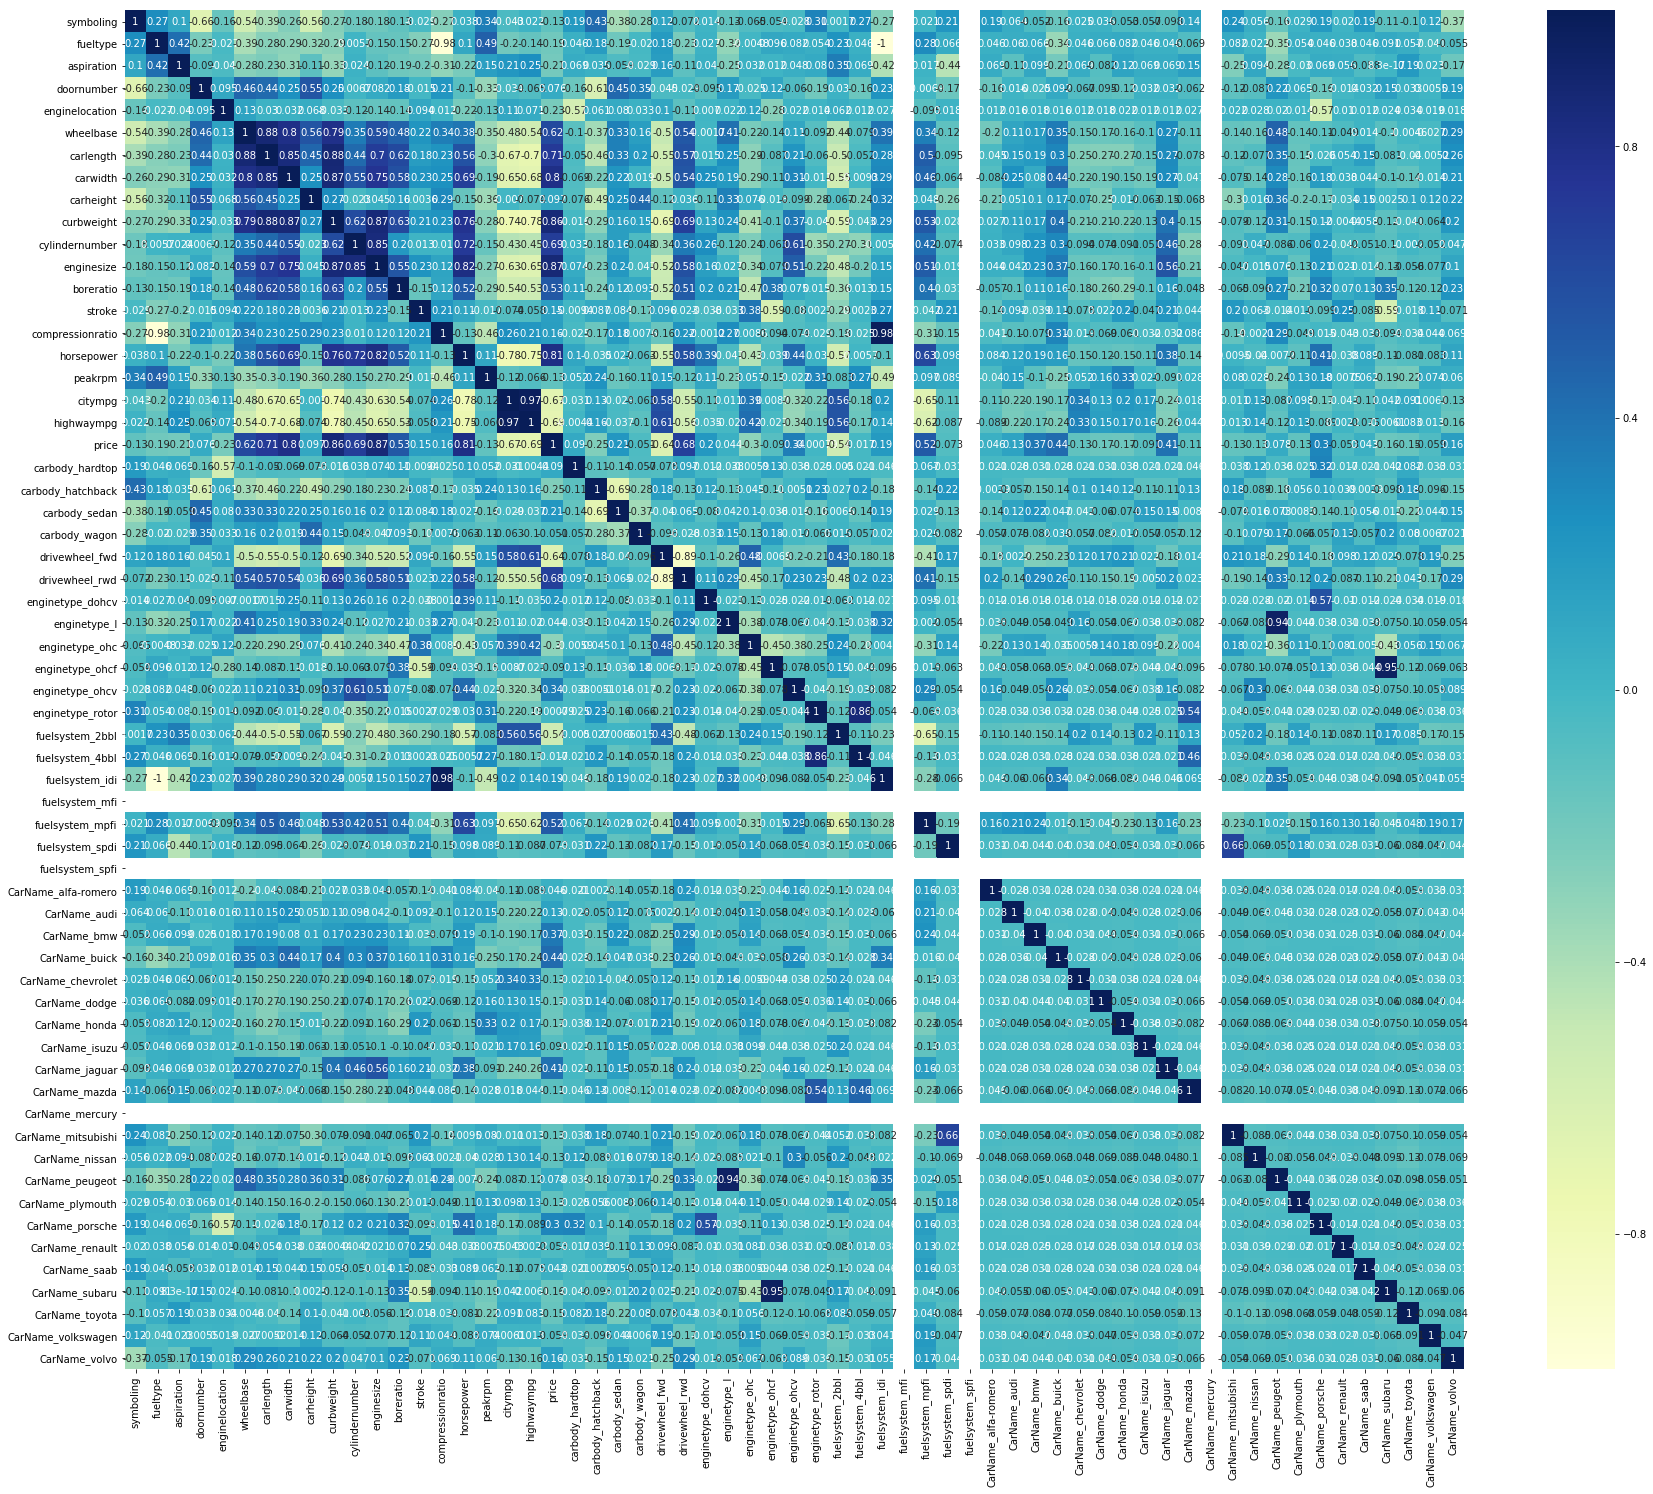

In [66]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", fmt=".2g" )
plt.show()

##### Dividing into X and Y sets for the model building

In [67]:
y_train = df_train.pop('price')
X_train = df_train

In [69]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
print(lm.coef_)
print(lm.intercept_)
print(lm.get_params())

[-1.59612382e-03 -1.53444543e-01 -8.43722075e-02  4.44603624e-03
 -1.97264718e-01  2.26046464e-01 -1.27285824e-01  2.08758206e-02
 -1.69974358e-01  2.77656489e-01 -5.37853590e-02  1.39238133e+00
 -3.29409830e-01 -1.48977954e-01 -2.53336223e-02 -6.96176385e-04
  8.47207417e-05  1.96433603e-03  2.45947882e-03 -1.22163541e-01
 -1.36207755e-01 -1.14600819e-01 -9.54732437e-02 -1.35583013e-02
  9.82743262e-03  1.94003354e-01  2.13788107e-01  6.08133071e-02
  1.45655583e-01  1.74553700e-03  2.40821735e-01  2.57817676e-02
 -6.56434960e-02  1.53444543e-01 -1.11022302e-16 -8.60352874e-03
 -1.25855743e-02  2.42861287e-17  4.33540261e-02  1.57717238e-02
  2.61923542e-01  6.75138325e-02 -8.36926467e-02 -1.11094602e-01
 -6.44420491e-02 -2.25443390e-02 -9.98715633e-03  9.44871996e-03
 -2.22044605e-16 -1.30560724e-01 -1.00762011e-02 -2.43201565e-01
 -1.09985980e-01  2.14173091e-01 -2.78630630e-02  1.94939792e-01
 -5.16091353e-02  5.17879796e-03  5.39085491e-03  4.73630807e-02]
-0.8634104821777497
{'co

In [71]:
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
# Printing the boolean results
rfe.support_

array([False, False, False, False,  True,  True, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True])

In [73]:
rfe.ranking_

array([37, 20,  4, 36,  1,  1, 18, 19,  1,  1,  6,  1,  1,  5, 22, 35, 38,
       34, 33,  1,  1,  1,  1, 27, 31,  2,  1, 26,  7, 21,  1, 17, 11, 14,
       39, 15, 13, 41, 23,  1,  1,  1, 12, 10, 16, 32,  1, 28, 40,  3, 29,
        1,  9,  1, 24,  1,  8, 25, 30,  1])

In [74]:
X_train.columns[rfe.support_]

Index(['enginelocation', 'wheelbase', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_l', 'enginetype_rotor', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_jaguar', 'CarName_peugeot',
       'CarName_porsche', 'CarName_saab', 'CarName_volvo'],
      dtype='object')

In [75]:
#variables that are to be dropped
X_train.columns
col = X_train.columns[~rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carlength',
       'carwidth', 'cylindernumber', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CarName_alfa-romero', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_plymouth',
       'CarName_renault', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen'],
      dtype='object')

#### Iteration - 1

In [135]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

y_train_rfe = y_train

In [136]:
X_train_new = train_model(X_train_rfe, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.0
Date:                Wed, 08 May 2019   Prob (F-statistic):           8.32e-66
Time:                        14:50:40   Log-Likelihood:                 221.16
No. Observations:                 143   AIC:                            -400.3
Df Residuals:                     122   BIC:                            -338.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3124      0.09

##### Elimation of insignificant variables
- all p-values are less than 0.05
- VIF < 5

#### Iteration - 2
 - enginetype_l

In [137]:
X_train_new = X_train_new.drop(labels=['enginetype_l'], axis=1)

In [138]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 08 May 2019   Prob (F-statistic):           5.22e-66
Time:                        14:51:39   Log-Likelihood:                 218.96
No. Observations:                 143   AIC:                            -397.9
Df Residuals:                     123   BIC:                            -338.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3113      0.09

#### Iteration - 3
    - CarName_peugeot

In [139]:
X_train_new = X_train_new.drop(labels=['CarName_peugeot'], axis=1)

In [140]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     108.7
Date:                Wed, 08 May 2019   Prob (F-statistic):           6.89e-67
Time:                        14:52:19   Log-Likelihood:                 218.56
No. Observations:                 143   AIC:                            -399.1
Df Residuals:                     124   BIC:                            -342.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3027      0.09

#### Iteration - 4
    - carheight

In [141]:
X_train_new = X_train_new.drop(labels=['carheight'], axis=1)
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 08 May 2019   Prob (F-statistic):           3.52e-67
Time:                        14:53:06   Log-Likelihood:                 216.58
No. Observations:                 143   AIC:                            -397.2
Df Residuals:                     125   BIC:                            -343.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2590      0.08

#### Iteration-4
    - wheelbase

In [142]:
X_train_new = X_train_new.drop(labels=['wheelbase'], axis=1)
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     118.9
Date:                Wed, 08 May 2019   Prob (F-statistic):           7.16e-68
Time:                        14:53:30   Log-Likelihood:                 215.64
No. Observations:                 143   AIC:                            -397.3
Df Residuals:                     126   BIC:                            -346.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2415      0.08

#### Iteration - 4
    - carbody_hardtop

In [143]:
X_train_new = X_train_new.drop(labels=['carbody_hardtop'], axis=1)
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.4
Date:                Wed, 08 May 2019   Prob (F-statistic):           3.16e-68
Time:                        14:54:02   Log-Likelihood:                 213.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     127   BIC:                            -348.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1504      0.07

#### Iteration - 5
    - enginelocation

In [144]:
X_train_new = X_train_new.drop(labels=['enginelocation'], axis=1)
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 08 May 2019   Prob (F-statistic):           2.15e-68
Time:                        14:54:41   Log-Likelihood:                 211.45
No. Observations:                 143   AIC:                            -392.9
Df Residuals:                     128   BIC:                            -348.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0112      0.02

In [145]:
calculate_VIF(X_train_new)

Features    VIF
0               const  33.35
2          enginesize   9.77
1          curbweight   7.98
5       carbody_sedan   6.38
4   carbody_hatchback   5.79
6       carbody_wagon   3.98
11     CarName_jaguar   2.20
3           boreratio   2.15
10      CarName_buick   1.54
7    enginetype_rotor   1.44
12    CarName_porsche   1.34
9         CarName_bmw   1.31
14      CarName_volvo   1.19
8        CarName_audi   1.18
13       CarName_saab   1.09

#### Iteration - 6
 - enginesize

In [146]:
X_train_new = X_train_new.drop(labels=['enginesize'], axis=1)
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     122.6
Date:                Wed, 08 May 2019   Prob (F-statistic):           6.51e-66
Time:                        15:09:39   Log-Likelihood:                 202.29
No. Observations:                 143   AIC:                            -376.6
Df Residuals:                     129   BIC:                            -335.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0369      0.02

In [126]:
# calculate_VIF(X_train_new)

#### Iteration - 7
- boreratio

In [147]:
X_train_new = X_train_new.drop(labels=['boreratio'], axis=1)
X_train_new = train_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     128.3
Date:                Wed, 08 May 2019   Prob (F-statistic):           6.91e-66
Time:                        15:09:47   Log-Likelihood:                 199.49
No. Observations:                 143   AIC:                            -373.0
Df Residuals:                     130   BIC:                            -334.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0132      0.02

#### Iteration - 8
- enginetype_rotor

In [149]:
X_train_new = X_train_new.drop(labels=['enginetype_rotor'], axis=1)
X_train_new = train_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 08 May 2019   Prob (F-statistic):           8.36e-66
Time:                        15:10:02   Log-Likelihood:                 196.54
No. Observations:                 143   AIC:                            -369.1
Df Residuals:                     131   BIC:                            -333.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0120      0.02

#### Iteration - 9
- CarName_saab

In [150]:
X_train_new = X_train_new.drop(labels=['CarName_saab'], axis=1)
X_train_new = train_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.87e-66
Time:                        15:10:09   Log-Likelihood:                 195.41
No. Observations:                 143   AIC:                            -368.8
Df Residuals:                     132   BIC:                            -336.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0094      0.02

In [151]:
calculate_VIF(X_train_new)

Features    VIF
0               const  27.59
3       carbody_sedan   6.11
2   carbody_hatchback   5.54
4       carbody_wagon   3.44
1          curbweight   2.07
7       CarName_buick   1.43
8      CarName_jaguar   1.43
6         CarName_bmw   1.17
10      CarName_volvo   1.16
9     CarName_porsche   1.12
5        CarName_audi   1.09

#### Iteration - 10
- carbody_sedan

In [152]:
X_train_new = X_train_new.drop(labels=['carbody_sedan'], axis=1)
X_train_new = train_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     152.1
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.64e-65
Time:                        15:10:23   Log-Likelihood:                 190.28
No. Observations:                 143   AIC:                            -360.6
Df Residuals:                     133   BIC:                            -330.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0648      0.01

#### Iteration - 11
 - carbody_hatchback

In [153]:
X_train_new = X_train_new.drop(labels=['carbody_hatchback'], axis=1)
X_train_new = train_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.42e-66
Time:                        15:10:28   Log-Likelihood:                 190.10
No. Observations:                 143   AIC:                            -362.2
Df Residuals:                     134   BIC:                            -335.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0690      0.014     

In [154]:
calculate_VIF(X_train_new)

Features   VIF
0            const  6.39
1       curbweight  2.05
6   CarName_jaguar  1.42
5    CarName_buick  1.40
4      CarName_bmw  1.13
8    CarName_volvo  1.13
2    carbody_wagon  1.10
3     CarName_audi  1.08
7  CarName_porsche  1.07

- After Iteration-11, p-values and VIF values are considerate and we can assume the model we derived is proper and lets go ahead with Residual analysis of the model

### Residual Analysis of the model

In [155]:
lm = sm.OLS(y_train, X_train_new).fit()

In [156]:
y_predict = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

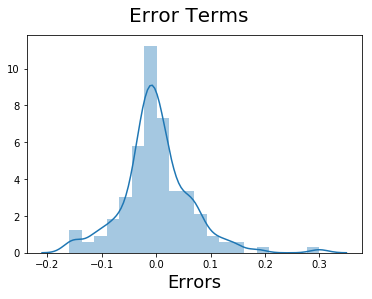

In [158]:
fig = plt.figure()
sns.distplot((y_train - y_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

 - From the Error graph we can observe the errors follows normal distribution except at the end, so the assumption of linear modelling is satisfied

### Prediction and Evaluation

In [161]:
# Scaling the df_test
df_test[scaler_variables] = scaler.fit_transform(df_test[scaler_variables])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [162]:
y_test = df_test.pop('price')
X_test = df_test

In [164]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1) ## Need to remove as its not required
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [165]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

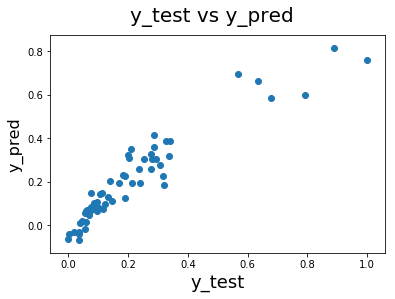

In [166]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [167]:

r2_score(y_test, y_pred)

0.8888508960271717

In [171]:

mean_absolute_error(y_test, y_pred)

0.051187386820379724

In [172]:

explained_variance_score(y_test, y_pred)

0.8904563286810572

In [168]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.42e-66
Time:                        15:54:47   Log-Likelihood:                 190.10
No. Observations:                 143   AIC:                            -362.2
Df Residuals:                     134   BIC:                            -335.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0690      0.014     -4.938      0.000      -0.097      -0.041
curbweight          0.6195      0.038     16.463      0.000       0.545       0.694
carbody_wagon      -0.0594      0.017     -3.481      0.001      -0.093      -0.026
CarName_audi        0.1064      0.031      3.400      0.001       0.045       0.168
CarName_bmw         0.3144      0.029     10.724      0.000       0.256       0.372
CarName_buick       0.2643      0.036      7.406      0.000       0.194       0.335
CarName_jaguar      0.2733      0.046      5.942      0.000       0.182       0.364
CarName_porsche     0.3776      0.040      9.473      0.000       0.299       0.456
CarName_volvo       0.0894      0.029      3.044      0.003       0.031       0.147
==============================================================================
Omnibus:                       26.433   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.513
Skew:                           0.687   Prob(JB):                     2.96e-16
Kurtosis:                       6.180   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Inference

1. R-Square and Adjusted R-Square explains the fit of the model, which is 91.1% and 90.6%; which is good
2. Prob (F-statistic) = 1.42e-66, which is approximately 0(zero) confirmns once again the derived model is significant and Variance(R-Quare and Adjusted-R-Square is not by chance)
3. p-values of all the coefficients is less than 0.05, implies all the significant